In [162]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
nba_df = pd.read_csv("C:/Users/morro/OneDrive/Documents/Group Projects/Project 4/merged_df3.5.csv")
nba_df.head()

,game_date_est,game_id,home_team,away_team,home_team_wins,pts_home,pts_away,pts_comb_actual,book_name_over,total1_over,over_odds,book_name_under,total1_under,under_odds,over_successful,under_successful
0,9/30/2017,11700001,GSW,DEN,0,102,108,210,Intertops,223.0,-110,Pinnacle Sports,222.5,108,0,1
1,9/30/2017,11700002,LAL,MIN,0,99,108,207,Pinnacle Sports,214.5,-110,Bookmaker,216.0,-102,0,1
2,11/1/2017,21700111,NYK,HOU,0,97,119,216,5Dimes,214.0,-107,Pinnacle Sports,215.5,-102,1,0
3,11/1/2017,21700107,PHI,ATL,1,119,109,228,Pinnacle Sports,209.0,-104,5Dimes,209.0,-105,1,0
4,11/1/2017,21700108,WAS,PHX,0,116,122,238,Pinnacle Sports,227.5,-105,Heritage,228.0,-105,1,0


In [163]:
# Drop the non-beneficial ID column, 'game_date_est'.
nba_df = nba_df.drop(columns=['game_date_est'], axis=1)
nba_df.head()

,game_id,home_team,away_team,home_team_wins,pts_home,pts_away,pts_comb_actual,book_name_over,total1_over,over_odds,book_name_under,total1_under,under_odds,over_successful,under_successful
0,11700001,GSW,DEN,0,102,108,210,Intertops,223.0,-110,Pinnacle Sports,222.5,108,0,1
1,11700002,LAL,MIN,0,99,108,207,Pinnacle Sports,214.5,-110,Bookmaker,216.0,-102,0,1
2,21700111,NYK,HOU,0,97,119,216,5Dimes,214.0,-107,Pinnacle Sports,215.5,-102,1,0
3,21700107,PHI,ATL,1,119,109,228,Pinnacle Sports,209.0,-104,5Dimes,209.0,-105,1,0
4,21700108,WAS,PHX,0,116,122,238,Pinnacle Sports,227.5,-105,Heritage,228.0,-105,1,0


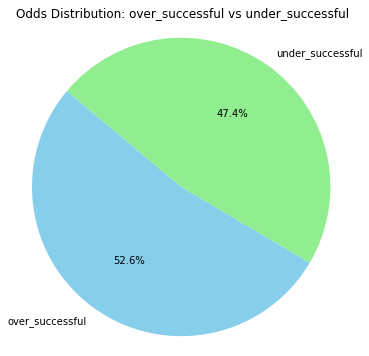

In [164]:
# data
over_successful = 2.0
under_successful = 1.8

# Data labels
labels = ['over_successful', 'under_successful']

# Data values
values = [over_successful, under_successful]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Odds Distribution: over_successful vs under_successful')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the chart
plt.show()

In [175]:
# Determine the number of unique values in each column.
nba_df.nunique()

game_id             1210
home_team             30
away_team             30
home_team_wins         2
pts_home              68
pts_away              68
pts_comb_actual      106
book_name_over         9
total1_over           92
over_odds             21
book_name_under        8
total1_under          89
under_odds            22
over_successful        2
under_successful       2
dtype: int64

In [176]:
# Look at over_odds value counts
over_counts = nba_df['over_odds'].value_counts()
over_counts

-105    555
-103    138
-102    116
-110     66
-104     55
-101     48
-107     43
-108     37
-100     37
 100     26
 102     22
-115     13
-106     13
 101     12
-109      8
 103      8
 104      6
 105      4
-111      1
 106      1
 109      1
Name: over_odds, dtype: int64

In [177]:
# Look at under_odds value counts
under_counts = nba_df['under_odds'].value_counts()
under_counts

-105    655
-103    108
-102     77
-104     63
-100     59
-110     57
-101     35
-115     25
 102     21
-107     19
 100     16
-108     15
-106     15
-109     14
 101      8
 104      6
 105      5
 103      4
 109      3
-113      2
 108      2
-111      1
Name: under_odds, dtype: int64

In [168]:
# Convert categorical data to numeric with `pd.get_dummies`
nba_numeric = pd.get_dummies(nba_df)
nba_numeric.head()

,game_id,home_team_wins,pts_home,pts_away,pts_comb_actual,total1_over,over_odds,total1_under,under_odds,over_successful,...,book_name_over_Pinnacle Sports,book_name_over_YouWager,book_name_under_5Dimes,book_name_under_BetOnline,book_name_under_Bookmaker,book_name_under_Bovada,book_name_under_Heritage,book_name_under_Intertops,book_name_under_Pinnacle Sports,book_name_under_YouWager
0,11700001,0,102,108,210,223.0,-110,222.5,108,0,...,0,0,0,0,0,0,0,0,1,0
1,11700002,0,99,108,207,214.5,-110,216.0,-102,0,...,1,0,0,0,1,0,0,0,0,0
2,21700111,0,97,119,216,214.0,-107,215.5,-102,1,...,0,0,0,0,0,0,0,0,1,0
3,21700107,1,119,109,228,209.0,-104,209.0,-105,1,...,1,0,1,0,0,0,0,0,0,0
4,21700108,0,116,122,238,227.5,-105,228.0,-105,1,...,1,0,0,0,0,0,1,0,0,0


In [169]:
# Split our preprocessed data into our features and target arrays
X = nba_numeric.drop(['over_successful'], axis=1)
y = nba_numeric['under_successful']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58)

In [170]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [171]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8
hidden_nodes_layer3= 6

nba_model = tf.keras.models.Sequential()

# First hidden layer
nba_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
             input_dim=number_input_features, activation="relu"))

# Second hidden layer
nba_model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nba_model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, activation="relu"))

# Output layer
nba_model.add(tf.keras.layers.Dense(units=1, activation="relu"))


# Check the structure of the model
nba_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 10)                880       
                                                                 
 dense_69 (Dense)            (None, 8)                 88        
                                                                 
 dense_70 (Dense)            (None, 6)                 54        
                                                                 
 dense_71 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1,029
Trainable params: 1,029
Non-trainable params: 0
_________________________________________________________________


In [172]:
# Compile the model
nba_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [173]:
# Train the model
fit_model = nba_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
29/29 [==============================] - 1s 2ms/step - loss: 2.3966 - accuracy: 0.4664
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 1.4502 - accuracy: 0.5050
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 1.1220 - accuracy: 0.5458
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.9677 - accuracy: 0.5755
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.8531 - accuracy: 0.5998
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.7368 - accuracy: 0.6185
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.6494
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.6648
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.6902
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7178
Epoch 11/

In [174]:
# Evaluate the model using the test data
model_loss, model_accuracy = nba_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.0851 - accuracy: 0.9736 - 100ms/epoch - 10ms/step
Loss: 0.08512932062149048, Accuracy: 0.9735973477363586
